In [1]:
# ----- LIBS

import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Apontando para o path do dataset da Unicamp
import os

current_path = os.getcwd()
# print(current_path)

log_path_folder = "/log_model/"
log_obst_path_folder = "/log_obstacle_model/"
okumura_path_folder = "/okumura_model/"

rssi_results_file = "rssi_results_C2T1.txt"
per_results_file  = "PER_results_C2T1.txt"

In [3]:
# # ----- NETWORK DATASET

# path = current_path + log_path_folder + rssi_results_file
# rssi_df = pd.read_csv(path, header=None) 
# rssi_df.columns = ["gwId", "nodeId", "RSSI_Sim", "RSSI_Real", "distance_between"]

# print("SHAPE:", rssi_df.shape)
# rssi_df.head(3)

In [4]:
# aux1 = rssi_df.iloc[0:246]["RSSI_Sim"][0]
# aux2 = rssi_df.iloc[246:246*2]["RSSI_Sim"][246]
# aux3 = rssi_df.iloc[246*2:246*3]["RSSI_Sim"][246*2]

# (aux1 + aux2 + aux3)/3

In [5]:
# average = []
# soma = 0
# simulation_repeat = 10
# delta = 246 # nº de linhas por simulação

# for sample in range(246):
#     soma = 0
#     for i in range(10): 
# #        print(i)
#        soma = rssi_df.iloc[i*delta:(i+1)*delta]["RSSI_Sim"][i*delta + sample] + soma
#     average.append(soma/10)
    
# print(len(average))
# print(average)

In [6]:
# each_simulation = []
# simulation_repeat = 10
# delta = 246 # nº de linhas por simulação

# for i in range(simulation_repeat):   
# #     print(i*delta, (i+1)*delta)
#     each_simulation.append(rssi_df.iloc[i*delta: (i+1)*delta])


# LOG DISTANCE MODEL

In [7]:
# ----- NETWORK DATASET

path = current_path + log_path_folder + rssi_results_file
rssi_log_df = pd.read_csv(path, header=None) 
rssi_log_df.columns = ["gwId", "nodeId", "RSSI_Sim", "RSSI_Real", "distance_between"]

print("SHAPE:", rssi_log_df.shape)
rssi_log_df.head(5)

SHAPE: (246, 5)


,gwId,nodeId,RSSI_Sim,RSSI_Real,distance_between
0,1,0,-54.1667,-95,23.3697
1,1,0,-54.1667,-96,23.3697
2,1,0,-63.0443,-94,39.0781
3,1,0,-77.1855,-103,88.6335
4,1,0,-85.1369,-103,140.4700


In [8]:
# deltaY and deltaY_abs colunms
rssi_log_df['deltaY'] = rssi_log_df['RSSI_Sim'] - rssi_log_df['RSSI_Real']
rssi_log_df['deltaY_abs'] = abs(rssi_log_df['RSSI_Sim'] - rssi_log_df['RSSI_Real'])
rssi_log_df.head(5)

,gwId,nodeId,RSSI_Sim,RSSI_Real,distance_between,deltaY,deltaY_abs
0,1,0,-54.1667,-95,23.3697,40.8333,40.8333
1,1,0,-54.1667,-96,23.3697,41.8333,41.8333
2,1,0,-63.0443,-94,39.0781,30.9557,30.9557
3,1,0,-77.1855,-103,88.6335,25.8145,25.8145
4,1,0,-85.1369,-103,140.4700,17.8631,17.8631


In [9]:
N = 246

# mean prediction error
mean_prediction_error = (1/N) * rssi_log_df['deltaY'].sum()

# mean absolute error
mean_absolute_error = (1/N) * rssi_log_df['deltaY_abs'].sum() 

In [10]:
# standard deviation of the prediction error
rssi_log_df['error'] = (rssi_log_df['deltaY'] - mean_absolute_error) ** 2
rssi_log_df.head(5)

,gwId,nodeId,RSSI_Sim,RSSI_Real,distance_between,deltaY,deltaY_abs,error
0,1,0,-54.1667,-95,23.3697,40.8333,40.8333,557.988072
1,1,0,-54.1667,-96,23.3697,41.8333,41.8333,606.231614
2,1,0,-63.0443,-94,39.0781,30.9557,30.9557,188.902240
3,1,0,-77.1855,-103,88.6335,25.8145,25.8145,74.011112
4,1,0,-85.1369,-103,140.4700,17.8631,17.8631,0.424545


In [11]:
sd_error = math.sqrt( (1/N) * (rssi_log_df['error'].sum()) )

print(mean_prediction_error)
print(mean_absolute_error)
print(sd_error)

-12.22770772357724
17.21152886178862
32.9724119691427


# LOG + Obstacle Model

In [12]:
path = current_path + log_obst_path_folder + rssi_results_file
print(path)
rssi_obst_df = pd.read_csv(path, header=None) 
rssi_obst_df.columns = ["gwId", "nodeId", "RSSI_Sim", "RSSI_Real", "distance_between"]

/home/wasp/Desktop/Mestrado/NS3/testes/ns-3/simulation_results/log_obstacle_model/rssi_results_C2T1.txt


In [13]:
# deltaY and deltaY_abs colunms
rssi_obst_df['deltaY'] = rssi_obst_df['RSSI_Sim'] - rssi_obst_df['RSSI_Real']
rssi_obst_df['deltaY_abs'] = abs(rssi_obst_df['RSSI_Sim'] - rssi_obst_df['RSSI_Real'])
rssi_obst_df.head(5)

,gwId,nodeId,RSSI_Sim,RSSI_Real,distance_between,deltaY,deltaY_abs
0,1,0,-54.1667,-95,23.3697,40.8333,40.8333
1,1,0,-54.1667,-96,23.3697,41.8333,41.8333
2,1,0,-63.0443,-94,39.0781,30.9557,30.9557
3,1,0,-77.1855,-103,88.6335,25.8145,25.8145
4,1,0,-85.1369,-103,140.4700,17.8631,17.8631


In [14]:
# mean prediction error
mean_prediction_error = (1/N) * rssi_obst_df['deltaY'].sum()

# mean absolute error
mean_absolute_error = (1/N) * rssi_obst_df['deltaY_abs'].sum() 

In [15]:
# standard deviation of the prediction error
rssi_obst_df['error'] = (rssi_obst_df['deltaY'] - mean_absolute_error) ** 2
rssi_obst_df.head(5)

,gwId,nodeId,RSSI_Sim,RSSI_Real,distance_between,deltaY,deltaY_abs,error
0,1,0,-54.1667,-95,23.3697,40.8333,40.8333,557.988072
1,1,0,-54.1667,-96,23.3697,41.8333,41.8333,606.231614
2,1,0,-63.0443,-94,39.0781,30.9557,30.9557,188.902240
3,1,0,-77.1855,-103,88.6335,25.8145,25.8145,74.011112
4,1,0,-85.1369,-103,140.4700,17.8631,17.8631,0.424545


In [16]:
sd_error = math.sqrt( (1/N) * (rssi_obst_df['error'].sum()) )

print(mean_prediction_error)
print(mean_absolute_error)
print(sd_error)

-12.22770772357724
17.21152886178862
32.9724119691427


# LOG + Okumura

In [17]:
path = current_path + okumura_path_folder + rssi_results_file
print(path)
rssi_df = pd.read_csv(path, header=None) 
rssi_df.columns = ["gwId", "nodeId", "RSSI_Sim", "RSSI_Real", "distance_between"]

/home/wasp/Desktop/Mestrado/NS3/testes/ns-3/simulation_results/okumura_model/rssi_results_C2T1.txt


In [18]:
# deltaY and deltaY_abs colunms
rssi_df['deltaY'] = rssi_df['RSSI_Sim'] - rssi_df['RSSI_Real']
rssi_df['deltaY_abs'] = abs(rssi_df['RSSI_Sim'] - rssi_df['RSSI_Real'])
rssi_df.head(5)

,gwId,nodeId,RSSI_Sim,RSSI_Real,distance_between,deltaY,deltaY_abs
0,1,0,-41.6862,-95,23.3697,53.3138,53.3138
1,1,0,-41.6862,-96,23.3697,54.3138,54.3138
2,1,0,-50.7389,-94,39.0781,43.2611,43.2611
3,1,0,-65.1590,-103,88.6335,37.8410,37.8410
4,1,0,-73.2672,-103,140.4700,29.7328,29.7328


In [19]:
# mean prediction error
mean_prediction_error = (1/N) * rssi_df['deltaY'].sum()

# mean absolute error
mean_absolute_error = (1/N) * rssi_df['deltaY_abs'].sum() 

In [20]:
# standard deviation of the prediction error
rssi_df['error'] = (rssi_df['deltaY'] - mean_absolute_error) ** 2
rssi_df.head(5)

,gwId,nodeId,RSSI_Sim,RSSI_Real,distance_between,deltaY,deltaY_abs,error
0,1,0,-41.6862,-95,23.3697,53.3138,53.3138,1765.246869
1,1,0,-41.6862,-96,23.3697,54.3138,54.3138,1850.276551
2,1,0,-50.7389,-94,39.0781,43.2611,43.2611,1021.578461
3,1,0,-65.1590,-103,88.6335,37.8410,37.8410,704.479943
4,1,0,-73.2672,-103,140.4700,29.7328,29.7328,339.806496


In [21]:
sd_error = math.sqrt( (1/N) * (rssi_df['error'].sum()) )

print(mean_prediction_error)
print(mean_absolute_error)
print(sd_error)

-0.8640849593495937
11.298958943089433
19.46291979839025


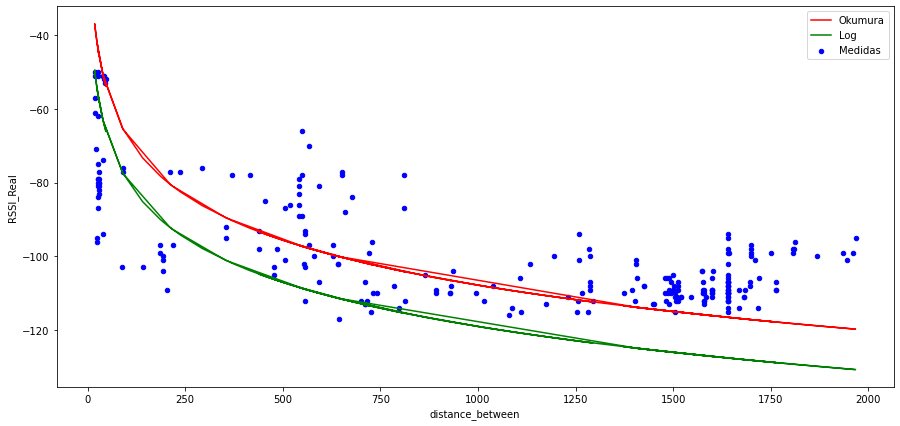

In [24]:
plt.figure(figsize=(15,7))
ax = plt.gca()

rssi_df.plot(kind='line',x="distance_between", y='RSSI_Sim',label='Okumura', color = 'red', ax=ax)
rssi_log_df.plot(kind='line',x="distance_between", y='RSSI_Sim',label='Log', color = 'green', ax=ax)
rssi_df.plot(kind='scatter',x="distance_between", y='RSSI_Real',label='Medidas', color = 'blue', ax=ax)

# plt.xlabel('Período de Teste', fontweight='bold', fontsize=14,labelpad=30)
# plt.ylabel('Nível de Enchimento (cm)', fontweight='bold', fontsize=14, labelpad=30)

# # ajust x axis datetime

# xfmt = mdates.DateFormatter('%d-%m-%y %H:%M')
# ax.xaxis.set_major_formatter(xfmt)

# ttl = ax.title
# ttl.set_position([.5, 1.04])
# plt.title('Leituras do Sensor Ultrassônico',fontweight='bold',fontsize=14)

plt.show()

